# Data Processing with Pandas

In [2]:
from datetime import datetime

import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv")
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [9]:
df["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [10]:
df["ST_NUM"].isnull().sum()

2

In [11]:
df["ST_NUM"].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [12]:
df["NUM_BEDROOMS"].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [ ]:
# df.loc[7:, "NUM_BEDROOMS"] = np.nan
# df["NUM_BEDROOMS"]

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv",
                 na_values=["n/a", "na", "", "--"])
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  5 non-null      float64
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [15]:
df["OWN_OCCUPIED"].isna()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [16]:
df["OWN_OCCUPIED"].unique()

array(['Y', 'N', '12', nan], dtype=object)

In [17]:
df["OWN_OCCUPIED"].value_counts()

Y     5
N     2
12    1
Name: OWN_OCCUPIED, dtype: int64

In [18]:
df.loc[0, "OWN_OCCUPIED"]

'Y'

In [19]:
for idx, row in enumerate(df.OWN_OCCUPIED):
    if not isinstance(row, str):
        continue
    try:
        int(row)
        df.loc[idx, "OWN_OCCUPIED"] = np.nan
    except:
        print(row, "tidak bisa jadi int")

df.OWN_OCCUPIED

Y tidak bisa jadi int
N tidak bisa jadi int
N tidak bisa jadi int
Y tidak bisa jadi int
Y tidak bisa jadi int
Y tidak bisa jadi int
Y tidak bisa jadi int


0      Y
1      N
2      N
3    NaN
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [20]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [21]:
df.NUM_BATH[0]

'1'

In [22]:
for idx, row in enumerate(df.NUM_BATH):
    if not isinstance(row, str):
        continue
    try:
        int(float(row))
        # df.loc[idx, "NUM_BATH"] = int(float(row))
    except:
        df.loc[idx, "NUM_BATH"] = np.nan

df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [23]:
int(float("1.5")), int(float("10"))

(1, 10)

In [24]:
df.NUM_BATH[0]

'1'

In [25]:
(df.isna().sum() / df.shape[0]) * 100

PID             11.111111
ST_NUM          22.222222
ST_NAME          0.000000
OWN_OCCUPIED    22.222222
NUM_BEDROOMS    44.444444
NUM_BATH        22.222222
SQ_FT           22.222222
dtype: float64

In [26]:
# df["ST_NUM"] = df["ST_NUM"].fillna(125)
df["ST_NUM"].fillna(125, inplace=True)

In [27]:
df["ST_NUM"]

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [28]:
df["OWN_OCCUPIED"].mode().values[0], df["OWN_OCCUPIED"].mode().item()

('Y', 'Y')

In [29]:
df["OWN_OCCUPIED"].fillna(df["OWN_OCCUPIED"].mode().values[0], inplace=True)
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,Y,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [30]:
int(df["NUM_BATH"].astype("float").mean())

1

In [31]:
df["NUM_BEDROOMS"].fillna(df["NUM_BEDROOMS"].median(), inplace=True)
df["NUM_BATH"].fillna(int(df["NUM_BATH"].astype("float").mean()), inplace=True)
df["SQ_FT"].fillna(df["SQ_FT"].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        9 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  9 non-null      object 
 4   NUM_BEDROOMS  9 non-null      float64
 5   NUM_BATH      9 non-null      object 
 6   SQ_FT         9 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [32]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,1,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,Y,2.0,1,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,1100.0
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [34]:
data = pd.ExcelFile("data/obes.xls")
data

In [35]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [36]:
data_age = data.parse("7.2", skiprows=4, skipfooter=14)
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [37]:
data_age.rename(columns={"Unnamed: 0": "Year"}, inplace=True)
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [38]:
data_age.dropna(inplace=True)
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [39]:
data_age.loc[:2]

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0


In [40]:
data_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         11 non-null     object 
 1   Total        11 non-null     float64
 2   Under 16     11 non-null     float64
 3   16-24        11 non-null     float64
 4   25-34        11 non-null     float64
 5   35-44        11 non-null     float64
 6   45-54        11 non-null     float64
 7   55-64        11 non-null     float64
 8   65-74        11 non-null     float64
 9   75 and over  11 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.3+ KB


In [41]:
data_age.set_index("Year", inplace=True)
data_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [42]:
data_age.index

Index(['2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08',
       '2008/09', '2009/10', '2010/11', '2011/12', '2012/13'],
      dtype='object', name='Year')

In [43]:
data_age.loc["2002/03":"2005/06"]

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [44]:
data_age.iloc[:2]

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0


<AxesSubplot:xlabel='Year'>

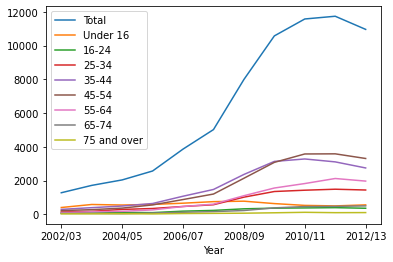

In [45]:
data_age.plot()

<AxesSubplot:xlabel='Year'>

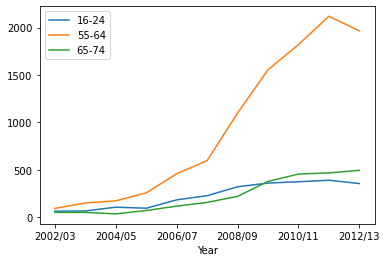

In [46]:
data_age["16-24"].plot(legend=True)
data_age["55-64"].plot(legend=True)
data_age["65-74"].plot(legend=True)

In [47]:
pd.date_range("2021/01/01", "2021/06/01", freq="D")

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
               '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
               '2021-05-31', '2021-06-01'],
              dtype='datetime64[ns]', length=152, freq='D')

In [48]:
daterange_hour = pd.date_range("2021/01/01", "2021/06/01", freq="H")
daterange_hour

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2021-05-31 15:00:00', '2021-05-31 16:00:00',
               '2021-05-31 17:00:00', '2021-05-31 18:00:00',
               '2021-05-31 19:00:00', '2021-05-31 20:00:00',
               '2021-05-31 21:00:00', '2021-05-31 22:00:00',
               '2021-05-31 23:00:00', '2021-06-01 00:00:00'],
              dtype='datetime64[ns]', length=3625, freq='H')

In [49]:
df = pd.DataFrame(daterange_hour, columns=["date"])
df

,date
0,2021-01-01 00:00:00
1,2021-01-01 01:00:00
2,2021-01-01 02:00:00
3,2021-01-01 03:00:00
4,2021-01-01 04:00:00
...,...
3620,2021-05-31 20:00:00
3621,2021-05-31 21:00:00
3622,2021-05-31 22:00:00
3623,2021-05-31 23:00:00


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3625 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 28.4 KB


In [51]:
df["data"] = np.random.randint(100, size=df.shape[0])
df

,date,data
0,2021-01-01 00:00:00,45
1,2021-01-01 01:00:00,6
2,2021-01-01 02:00:00,73
3,2021-01-01 03:00:00,36
4,2021-01-01 04:00:00,29
...,...,...
3620,2021-05-31 20:00:00,90
3621,2021-05-31 21:00:00,56
3622,2021-05-31 22:00:00,11
3623,2021-05-31 23:00:00,50


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3625 non-null   datetime64[ns]
 1   data    3625 non-null   int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 42.6 KB


In [53]:
df["datetime"] = df["date"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      3625 non-null   datetime64[ns]
 1   data      3625 non-null   int32         
 2   datetime  3625 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int32(1)
memory usage: 70.9 KB


In [54]:
df.set_index("date", inplace=True)
df

,data,datetime
date,,
2021-01-01 00:00:00,45,2021-01-01 00:00:00
2021-01-01 01:00:00,6,2021-01-01 01:00:00
2021-01-01 02:00:00,73,2021-01-01 02:00:00
2021-01-01 03:00:00,36,2021-01-01 03:00:00
2021-01-01 04:00:00,29,2021-01-01 04:00:00
...,...,...
2021-05-31 20:00:00,90,2021-05-31 20:00:00
2021-05-31 21:00:00,56,2021-05-31 21:00:00
2021-05-31 22:00:00,11,2021-05-31 22:00:00


In [55]:
df.index.week

<ipython-input-55-1397a0ba33b2>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df.index.week


Int64Index([53, 53, 53, 53, 53, 53, 53, 53, 53, 53,
            ...
            22, 22, 22, 22, 22, 22, 22, 22, 22, 22],
           dtype='int64', name='date', length=3625)

In [65]:
df.index.week, df.index.day_name(), df["datetime"].dt.weekday

<ipython-input-65-47da696632c4>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df.index.week, df.index.day_name(), df["datetime"].dt.weekday


(Int64Index([53, 53, 53, 53, 53, 53, 53, 53, 53, 53,
             ...
             22, 22, 22, 22, 22, 22, 22, 22, 22, 22],
            dtype='int64', name='date', length=3625),
 Index(['Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
        'Friday', 'Friday', 'Friday',
        ...
        'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
        'Monday', 'Monday', 'Tuesday'],
       dtype='object', name='date', length=3625),
 date
 2021-01-01 00:00:00    4
 2021-01-01 01:00:00    4
 2021-01-01 02:00:00    4
 2021-01-01 03:00:00    4
 2021-01-01 04:00:00    4
                       ..
 2021-05-31 20:00:00    0
 2021-05-31 21:00:00    0
 2021-05-31 22:00:00    0
 2021-05-31 23:00:00    0
 2021-06-01 00:00:00    1
 Name: datetime, Length: 3625, dtype: int64)

In [61]:
df.index.year

Int64Index([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='date', length=3625)

In [69]:
df.index.dayofyear, df.index.day_name(), df["datetime"].dt.quarter

(Int64Index([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
             ...
             151, 151, 151, 151, 151, 151, 151, 151, 151, 152],
            dtype='int64', name='date', length=3625),
 Index(['Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
        'Friday', 'Friday', 'Friday',
        ...
        'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
        'Monday', 'Monday', 'Tuesday'],
       dtype='object', name='date', length=3625),
 date
 2021-01-01 00:00:00    1
 2021-01-01 01:00:00    1
 2021-01-01 02:00:00    1
 2021-01-01 03:00:00    1
 2021-01-01 04:00:00    1
                       ..
 2021-05-31 20:00:00    2
 2021-05-31 21:00:00    2
 2021-05-31 22:00:00    2
 2021-05-31 23:00:00    2
 2021-06-01 00:00:00    2
 Name: datetime, Length: 3625, dtype: int64)

In [57]:
df[(df.index.hour <= 12) & (df.index.hour >= 6)]

,data,datetime
date,,
2021-01-01 06:00:00,89,2021-01-01 06:00:00
2021-01-01 07:00:00,87,2021-01-01 07:00:00
2021-01-01 08:00:00,35,2021-01-01 08:00:00
2021-01-01 09:00:00,26,2021-01-01 09:00:00
2021-01-01 10:00:00,66,2021-01-01 10:00:00
...,...,...
2021-05-31 08:00:00,78,2021-05-31 08:00:00
2021-05-31 09:00:00,89,2021-05-31 09:00:00
2021-05-31 10:00:00,14,2021-05-31 10:00:00


In [70]:
df[df.index.is_month_end]

,data,datetime
date,,
2021-01-31 00:00:00,84,2021-01-31 00:00:00
2021-01-31 01:00:00,31,2021-01-31 01:00:00
2021-01-31 02:00:00,19,2021-01-31 02:00:00
2021-01-31 03:00:00,32,2021-01-31 03:00:00
2021-01-31 04:00:00,23,2021-01-31 04:00:00
...,...,...
2021-05-31 19:00:00,17,2021-05-31 19:00:00
2021-05-31 20:00:00,90,2021-05-31 20:00:00
2021-05-31 21:00:00,56,2021-05-31 21:00:00


In [71]:
df.loc["2021-01-01 01":"2021-01-01 12"]

,data,datetime
date,,
2021-01-01 01:00:00,6,2021-01-01 01:00:00
2021-01-01 02:00:00,73,2021-01-01 02:00:00
2021-01-01 03:00:00,36,2021-01-01 03:00:00
2021-01-01 04:00:00,29,2021-01-01 04:00:00
2021-01-01 05:00:00,36,2021-01-01 05:00:00
2021-01-01 06:00:00,89,2021-01-01 06:00:00
2021-01-01 07:00:00,87,2021-01-01 07:00:00
2021-01-01 08:00:00,35,2021-01-01 08:00:00
2021-01-01 09:00:00,26,2021-01-01 09:00:00


In [72]:
df.resample("W").sum()

,data
date,
2021-01-03,3659
2021-01-10,7771
2021-01-17,8290
2021-01-24,7893
2021-01-31,8784
2021-02-07,8247
2021-02-14,8668
2021-02-21,8611
2021-02-28,8060


In [73]:
df.resample("2W").sum()

,data
date,
2021-01-03,3659
2021-01-17,16061
2021-01-31,16677
2021-02-14,16915
2021-02-28,16671
2021-03-14,16501
2021-03-28,16751
2021-04-11,16129
2021-04-25,16887


In [74]:
daily_average = df.resample("D").mean()
biweekly_average = df.resample("2W").mean()
monthly_total = df.resample("M").sum()

display(daily_average.head())
display(biweekly_average.head())
display(monthly_total.head())

,data
date,
2021-01-01,48.333333
2021-01-02,55.375000
2021-01-03,48.750000
2021-01-04,31.166667
2021-01-05,38.958333


,data
date,
2021-01-03,50.819444
2021-01-17,47.800595
2021-01-31,49.633929
2021-02-14,50.342262
2021-02-28,49.616071


,data
date,
2021-01-31,36397
2021-02-28,33586
2021-03-31,36484
2021-04-30,35886
2021-05-31,35831


In [75]:
daily_average.rolling(5).mean()

,data
date,
2021-01-01,NaN
2021-01-02,NaN
2021-01-03,NaN
2021-01-04,NaN
2021-01-05,44.516667
...,...
2021-05-28,48.425000
2021-05-29,47.866667
2021-05-30,48.058333


In [76]:
daily_average.rolling("5D").mean()

,data
date,
2021-01-01,48.333333
2021-01-02,51.854167
2021-01-03,50.819444
2021-01-04,45.906250
2021-01-05,44.516667
...,...
2021-05-28,48.425000
2021-05-29,47.866667
2021-05-30,48.058333


In [77]:
daily_average.rolling(5).mean().fillna(method="backfill")

,data
date,
2021-01-01,44.516667
2021-01-02,44.516667
2021-01-03,44.516667
2021-01-04,44.516667
2021-01-05,44.516667
...,...
2021-05-28,48.425000
2021-05-29,47.866667
2021-05-30,48.058333


In [78]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv")
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [79]:
df.shape

(4383, 5)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [81]:
df["Date"] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [82]:
df.set_index("Date", inplace=True)
df.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
2006-01-06,1403.427,NaN,NaN,NaN
2006-01-07,1300.287,NaN,NaN,NaN
2006-01-08,1207.985,NaN,NaN,NaN
2006-01-09,1529.323,NaN,NaN,NaN


In [83]:
df.index.year.unique(), df.index.year.value_counts()

(Int64Index([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
             2017],
            dtype='int64', name='Date'),
 2016    366
 2012    366
 2008    366
 2015    365
 2011    365
 2007    365
 2014    365
 2010    365
 2006    365
 2017    365
 2013    365
 2009    365
 Name: Date, dtype: int64)

In [84]:
df[df.index.month == 1]

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN
...,...,...,...,...
2017-01-27,1629.164,254.270,68.625,322.895
2017-01-28,1394.033,208.827,65.964,274.791
2017-01-29,1296.170,304.952,53.854,358.806


In [85]:
df["Year"] = df.index.year
df["Month"] = df.index.month
df["Weekday"] = df.index.weekday
df

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


In [86]:
df[df.Year == 2016]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2016-01-01,1060.366,107.209,18.563,125.772,2016,1,4
2016-01-02,1192.698,409.622,9.406,419.028,2016,1,5
2016-01-03,1179.282,406.296,13.519,419.815,2016,1,6
2016-01-04,1456.294,278.460,10.080,288.540,2016,1,0
2016-01-05,1506.737,206.468,12.549,219.017,2016,1,1
...,...,...,...,...,...,...,...
2016-12-27,1289.324,640.895,23.448,664.343,2016,12,1
2016-12-28,1294.881,214.990,19.450,234.440,2016,12,2
2016-12-29,1295.897,167.698,42.910,210.608,2016,12,3


In [87]:
df[df.Month == 1]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3
...,...,...,...,...,...,...,...
2017-01-27,1629.164,254.270,68.625,322.895,2017,1,4
2017-01-28,1394.033,208.827,65.964,274.791,2017,1,5
2017-01-29,1296.170,304.952,53.854,358.806,2017,1,6


In [88]:
list_columns = ["Consumption", "Wind", "Solar", "Wind+Solar"]
daily_average_opsd = df[list_columns].resample("D").mean()
weekly_average_opsd = df[list_columns].resample("W").mean()
monthly_average_opsd = df[list_columns].resample("M").mean()

In [89]:
daily_average_opsd

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [90]:
weekly_average_opsd

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571


In [91]:
monthly_average_opsd

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,1461.442065,NaN,NaN,NaN
2006-02-28,1467.106893,NaN,NaN,NaN
2006-03-31,1418.649161,NaN,NaN,NaN
2006-04-30,1275.058900,NaN,NaN,NaN
2006-05-31,1253.488484,NaN,NaN,NaN
...,...,...,...,...
2017-08-31,1291.283022,177.412839,148.477677,325.890516
2017-09-30,1335.952031,209.591000,102.643033,312.234033
2017-10-31,1366.297385,402.583774,68.727645,471.311419


<AxesSubplot:xlabel='Date'>

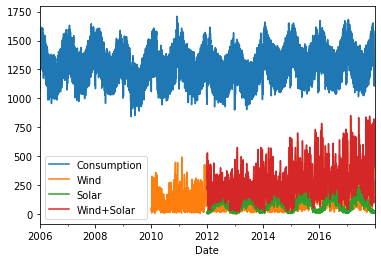

In [92]:
daily_average_opsd.plot()

In [93]:
daily_average_opsd.to_csv("data/daily_average_opsd.csv", index=True)